In [4]:
import matplotlib.pyplot as plt
import numpy as np
import math as m

signum = lambda x: -1 if x<0 else 1 #m.copysign(1, x)

save_dir = '.ignore/'
import os
try:
    os.makedirs(save_dir)
except FileExistsError:
    pass

In [5]:
def plot(fs, bounds=5, name=None):
    if not isinstance(fs, list):
        fs = [fs]

    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    for f in fs:
        x = np.arange(-bounds,bounds,0.01)
        y = [f(i) for i in x]

        plt.plot(x, y)
    plt.grid()
    if name:
        plt.savefig(name+'.pdf', bbox_inches = 'tight', pad_inches = 0)
    plt.show()
    
def plot_with_derivative(f, d, bounds=5, name=None):
    plt.figure(figsize=(15,5))

    x = np.arange(-bounds,bounds,0.01)
    y = [f(i) for i in x]
    y_d = [d(i) for i in x]

    plt.subplot(1,2,1)
    plt.gray()
    plt.plot(x, y, 'k', lw=3)
    plt.axhline(linewidth=.5, color='#000000')
    plt.axvline(linewidth=.5, color='#000000')
    plt.grid()
    
    plt.subplot(1,2,2)
    plt.gray()
    plt.plot(x, y_d, 'k', lw=3)
    plt.axhline(linewidth=.5, color='#000000')
    plt.axvline(linewidth=.5, color='#000000')
    plt.grid()
    
    if name:
        plt.savefig(save_dir+'func_'+name+'.pdf', bbox_inches = 'tight', pad_inches = 0)
    plt.show()
    
def auto_derivate(f, eps=1e-9):
    return lambda x: (f(x+eps) - f(x-eps)) / (2 * eps)

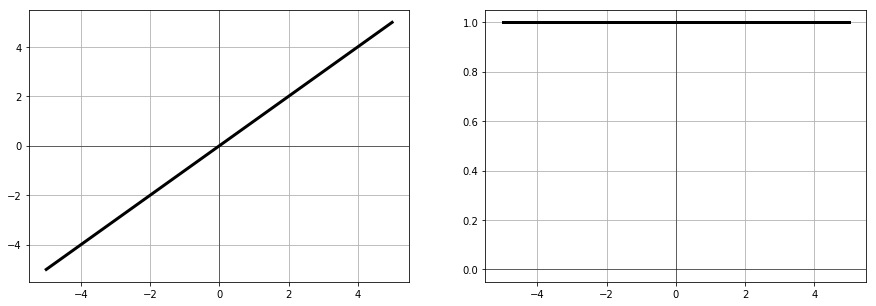

In [6]:
# Identity
plot_with_derivative(lambda x: x, lambda x: 1, name='Identity')

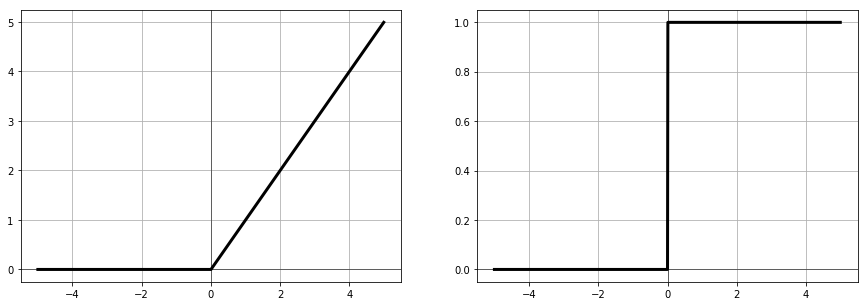

In [7]:
# ReLU
relu = lambda x: max(0,x)
relu_d = lambda x: 1 if x>0 else 0

plot_with_derivative(relu, relu_d, name='ReLU')

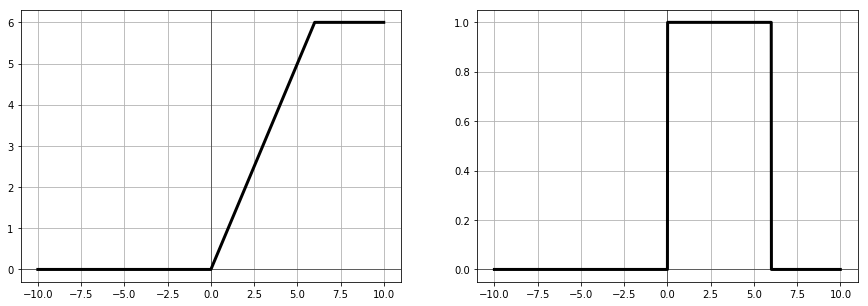

In [8]:
# ReLU6
relu6 = lambda x: min(6, relu(x))
relu6_d = lambda x: relu_d(x) if x<6 else 0

plot_with_derivative(relu6, relu6_d, bounds=10, name='ReLU6')

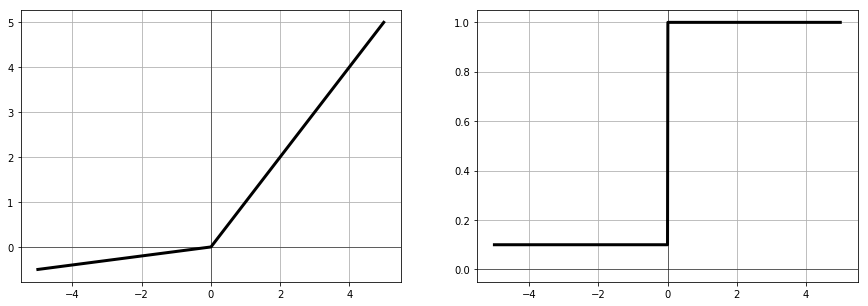

In [9]:
# LeakyReLU (0.1)
l = 0.1

def lrelu(x):
    return x if x > 0 else l * x

lrelu_d = lambda x: 1 if x > 0 else l
    
plot_with_derivative(lrelu, lrelu_d, name='LReLU')

In [10]:
# Parametric ReLU
#TODO: nacrtaj da se '-' dio uči
#plot_with_derivative(lrelu, lrelu_d, name='PReLU')

In [11]:
# Randomized ReLU
#TODO: nacrtaj da je '-' dio nasumičan u intervalu
#plot_with_derivative(lrelu, lrelu_d, name='RReLU')

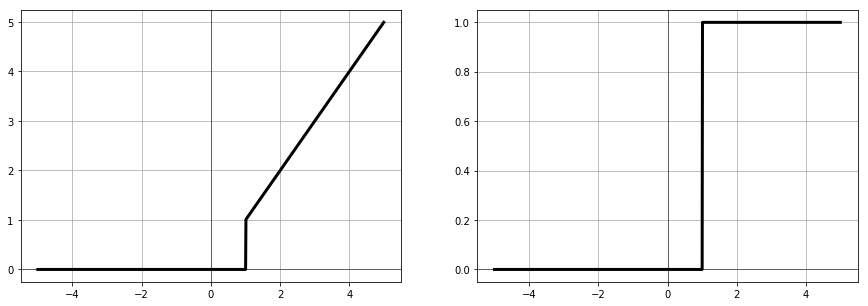

In [12]:
# Thresholded ReLU
theta = 1

threlu = lambda x: x if x > theta else 0
threlu_d = lambda x: 1 if x > theta else 0

plot_with_derivative(threlu, threlu_d, name='ThReLU')

In [13]:
# Dual ReLU
#TODO

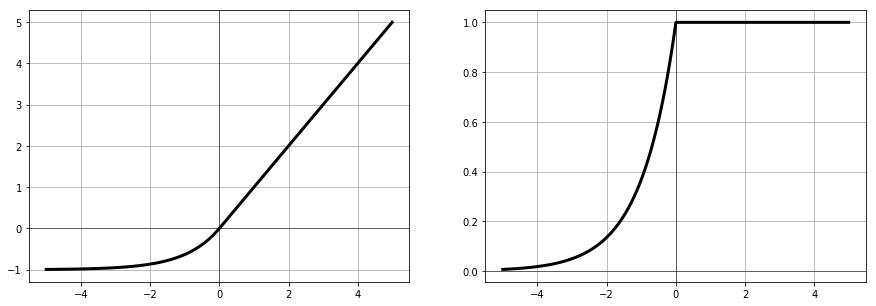

In [14]:
# ELU (1)
alpha = 1
elu = lambda x: x if x > 0 else alpha * (m.exp(x) - 1)
elu_d = lambda x: 1 if x > 0 else alpha * m.exp(x)

plot_with_derivative(elu, elu_d, name='ELU')

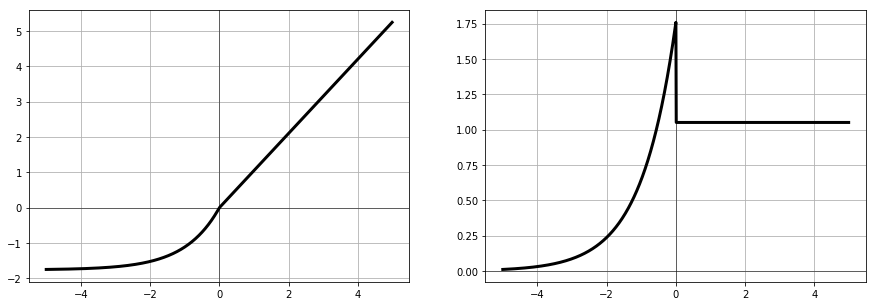

In [15]:
# SELU
l = 1.0507009873554804934193349852946
alpha = 1.6732632423543772848170429916717
selu = lambda x: l * elu(x)
selu_d = lambda x: l * elu_d(x)

selu = lambda x: l*x if x > 0 else l*alpha * (m.exp(x) - 1)
selu_d = lambda x: l*1 if x > 0 else l*alpha * m.exp(x)

plot_with_derivative(selu, selu_d, name='SELU')

In [16]:
# GELU
#TODO

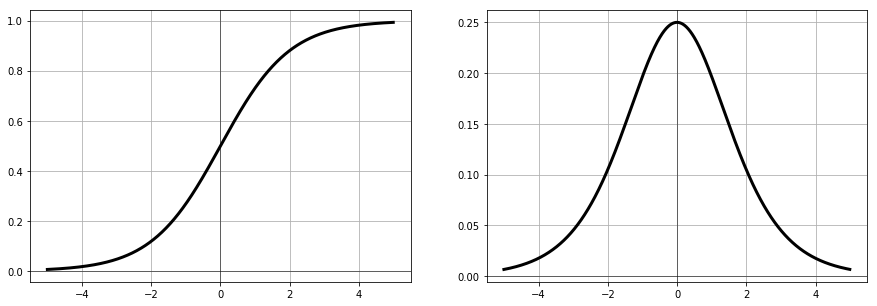

In [17]:
# Sigmoid
sigmoid = lambda x: 1/(1+m.exp(-x))
sigmoid_d = lambda x: sigmoid(x)*(1-sigmoid(x))

plot_with_derivative(sigmoid, sigmoid_d, name='Sigmoid')

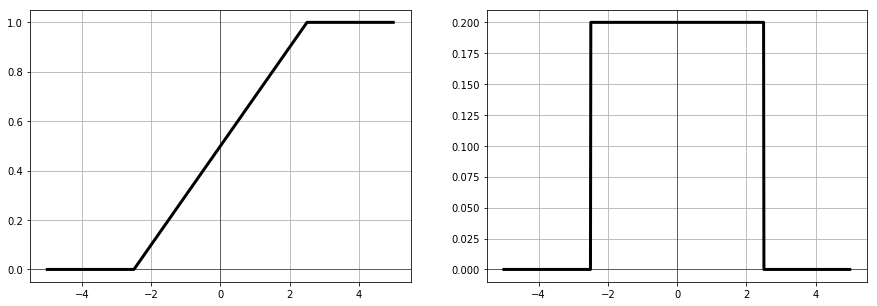

In [18]:
# Hard sigmoid
hsigmoid = lambda x: min(1, max(0, 0.2 * x + 0.5))
def hsigmoid_d(x):
    if x < -2.5 or x > 2.5:
        return 0
    return 0.2

plot_with_derivative(hsigmoid, hsigmoid_d, name='Hard_sigmoid')

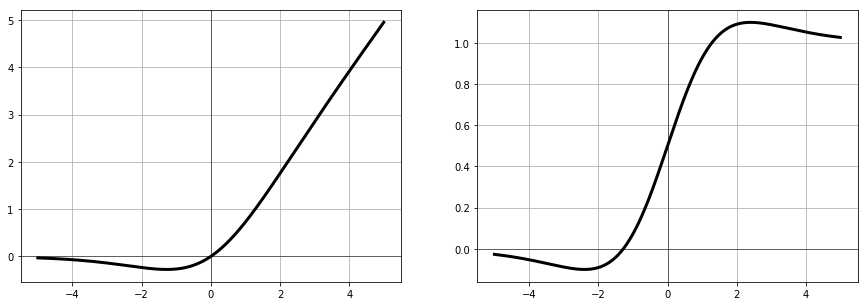

In [19]:
# Swish
swish = lambda x: x * sigmoid(x)
def swish_d(x):
    e = m.exp(x)
    #return e * (e + x + 1) / (e + 1)**2
    return sigmoid(x)*(1+x * (1-sigmoid(x)))

plot_with_derivative(swish, swish_d, name='Swish')

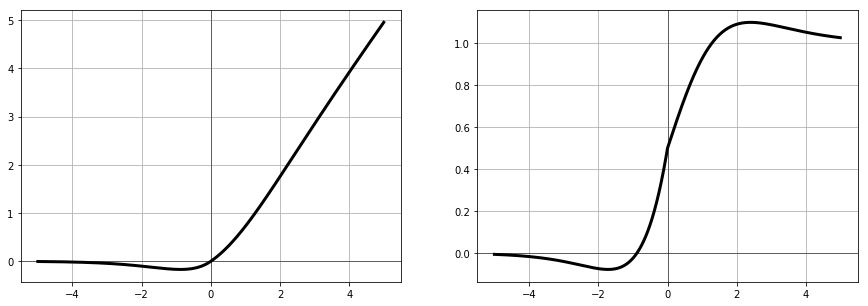

In [20]:
# ELiSH
alpha = 1
def elish(x):
    if x >= 0:
        return swish(x)
    else:
        return elu(x) * sigmoid(x)

def elish_d(x):
    if x >= 0:
        return swish_d(x)
    else:
        return elu(x) * sigmoid_d(x) + elu_d(x) * sigmoid(x)

plot_with_derivative(elish, elish_d, name='ELiSH')

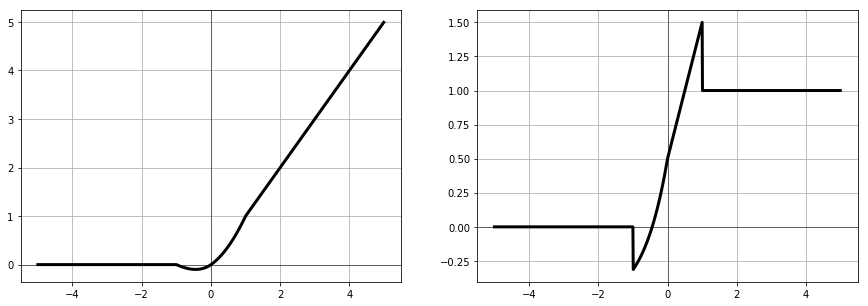

In [21]:
# Hard ELiSH
alpha = 1
a = lambda x: max(0, min(1, (x+1)/2))
a_d = lambda x: 0.5 if abs(x) <= 1 else 0

def helish(x):
    if x >= 0:
        return x * a(x)
    else:
        return elu(x) * a(x)

def helish_d(x):
    if x >= 0:
        return a(x) + x * a_d(x)
    else:
        return elu(x) * a_d(x) + elu_d(x) * a(x)
        
plot_with_derivative(helish, helish_d, name='Hard_ELiSH')

In [22]:
#eps = 1e-9
#
#def hh(x):
#    f_l = helish(x-eps)
#    f_u = helish(x+eps)
#    return (f_u - f_l) / (2 * eps)
#
#error = 0
#for i in range(-1000,1000):
#    x = i / 1000.
#    
#    fa_d = hh(x)
#    f_d = helish_d(x)
#    
#    error += f_d - fa_d
#    
#print('Avg. error:', error / 2001.)
#
#plot_with_derivative(helish, hh)

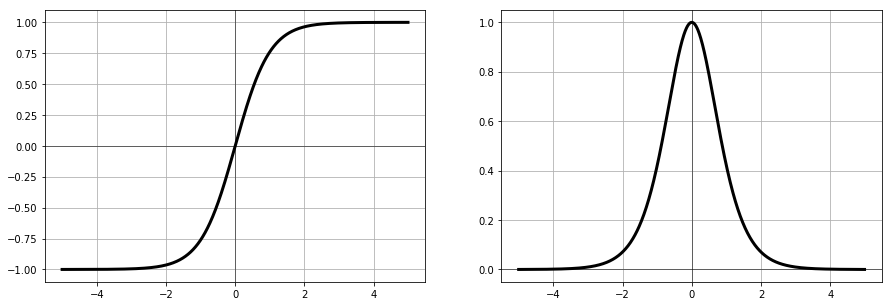

In [23]:
# tanh
def tanh(x):
    e = m.exp(2 * x)
    return (e - 1) / (e + 1)

tanh_d = lambda x: 1 - tanh(x)**2

plot_with_derivative(tanh, tanh_d, name='tanh')

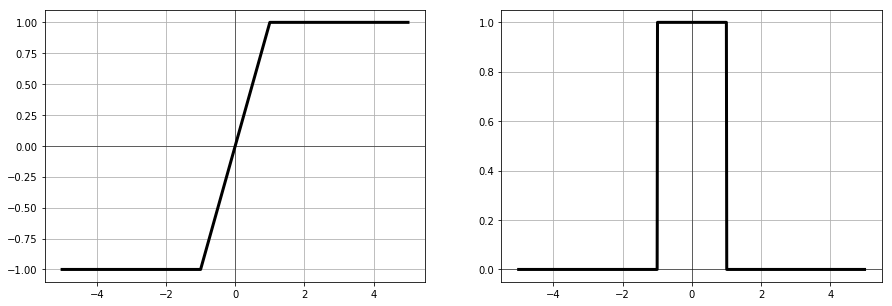

In [24]:
# Hard tanh
def htanh(x):
    if x < -1:
        return -1
    elif x > 1:
        return 1
    return x
def htanh_d(x):
    if x < -1 or x > 1:
        return 0
    return 1

plot_with_derivative(htanh, htanh_d, name='Hard_tanh')

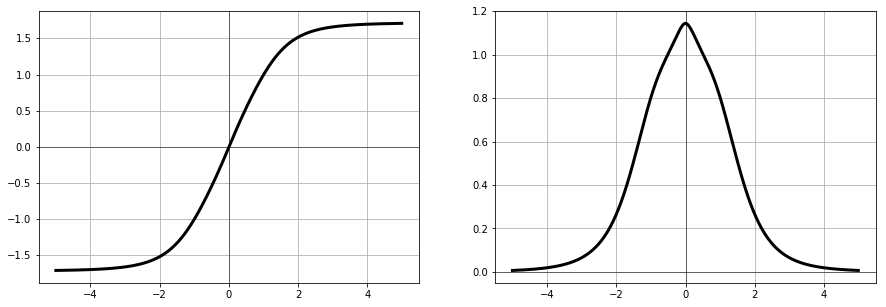

In [25]:
# Rational tanh (DL4J implementation original)
def rat_tanh(x):
    dis= x * 2/3.
    s = signum(dis) * (1 - 1./(1 + abs(dis) + dis**2 + 1.41645 * dis**4))
    return 1.7159 * s

def rat_tanh_d(x): 
    dis = 2 * x / 3.
    a = 1 + abs(dis) + dis**2 + 1.41645 * dis**4
    tderiv = (1 + signum(dis) * (2 * dis + 4 * 1.41645 * dis**3)) / (a**2)
    return 1.7159 * 2 / 3. * tderiv
plot_with_derivative(rat_tanh, rat_tanh_d, name='Rational_tanh')

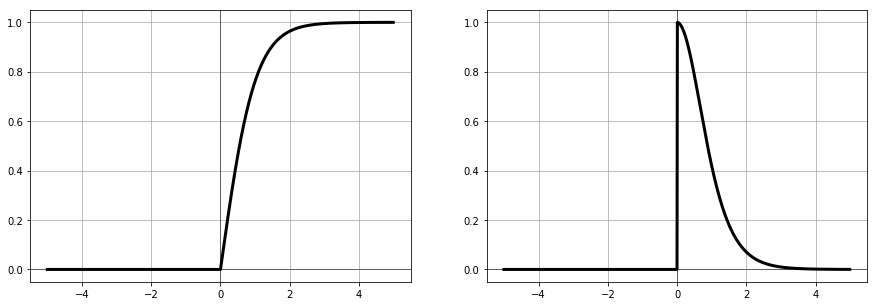

In [26]:
# Rectified tanh
rec_tanh = lambda x: max(0, tanh(x))
def rec_tanh_d(x):
    if x < 0:
        return 0
    else:
        return tanh_d(x)
plot_with_derivative(rec_tanh, rec_tanh_d, name='Rectified_tanh')

In [27]:
# Softmax
#TODO

In [28]:
# Hierarchical softmax
#TODO

In [29]:
# Maxout
#TODO

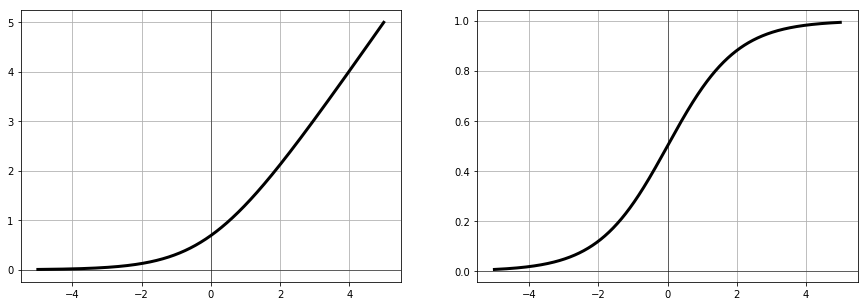

In [30]:
# Softplus
softplus = lambda x: m.log(1+m.exp(x))
softplus_d = lambda x: m.exp(x) / (1+m.exp(x))
plot_with_derivative(softplus, softplus_d, name='Softplus')

In [31]:
# Noisy softplus
#TODO

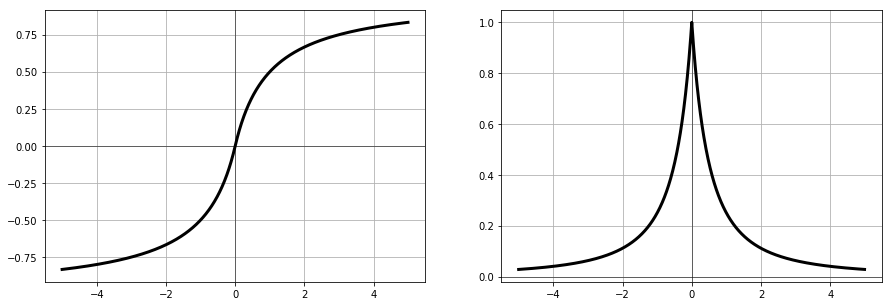

In [32]:
# Softsign
softsign = lambda x: x / (1+abs(x))
softsign_d = lambda x: (1 + abs(x) - x * signum(x)) / ((1 + abs(x))**2)
plot_with_derivative(softsign, softsign_d, name='Softsign')

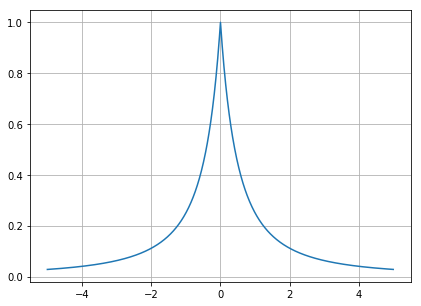

In [33]:
# Test softsign derivation
plot(auto_derivate(softsign))

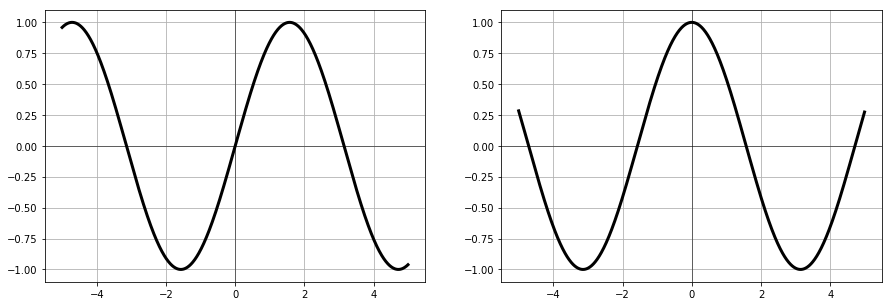

In [34]:
# Sin
sin = m.sin
sin_d = m.cos
plot_with_derivative(sin, sin_d, name='Sin')

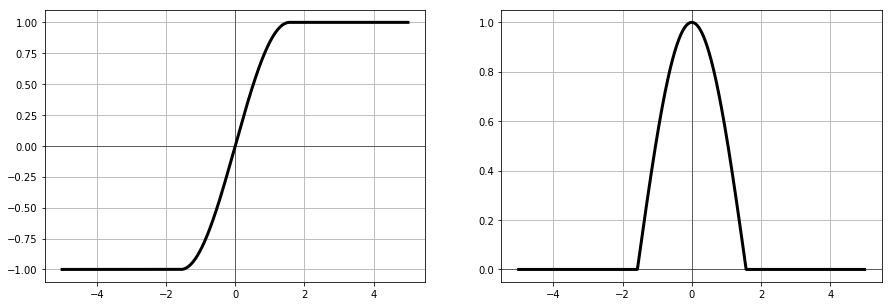

In [35]:
# Truncated sin
def trsin(x):
    if x >= -m.pi/2 and x<= m.pi/2:
        return m.sin(x)
    elif x > m.pi/2:
        return 1
    return -1
def trsin_d(x):
    if x >= -m.pi/2 and x<= m.pi/2:
        return m.cos(x)
    return 0

plot_with_derivative(trsin, trsin_d, name='TrSin')

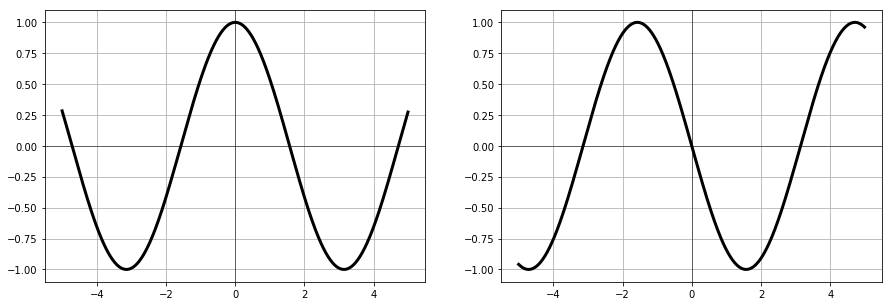

In [36]:
# Cos
cos = m.cos
cos_d = lambda x: -m.sin(x)
plot_with_derivative(cos, cos_d, name='Cos')

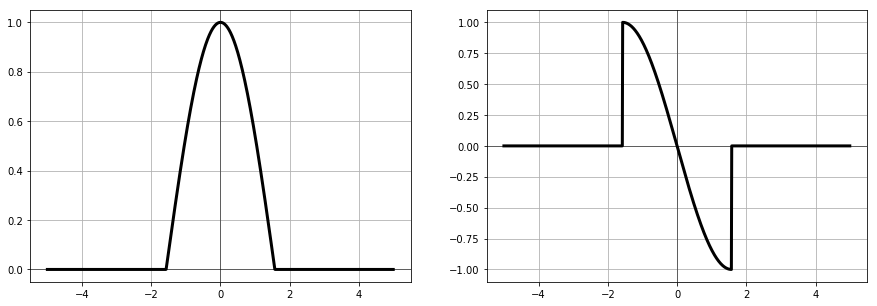

In [37]:
# Truncated sin
def trcos(x):
    if x >= -m.pi/2 and x<= m.pi/2:
        return m.cos(x)
    return 0
def trcos_d(x):
    if x >= -m.pi/2 and x<= m.pi/2:
        return -m.sin(x)
    return 0

plot_with_derivative(trcos, trcos_d, name='TrCos')

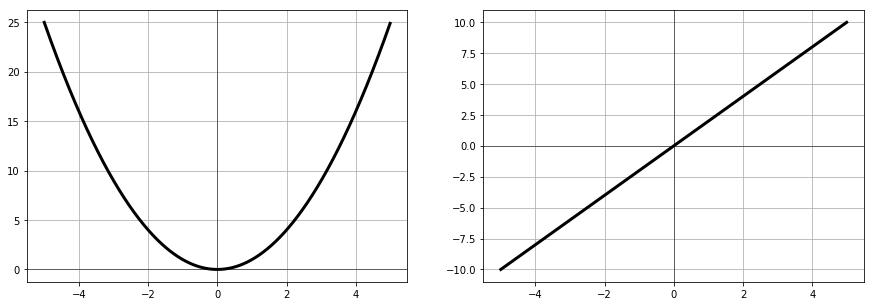

In [38]:
# Parabola
pow2 = lambda x: x**2
pow2_d = lambda x: 2*x
plot_with_derivative(pow2, pow2_d, name='Pow2')

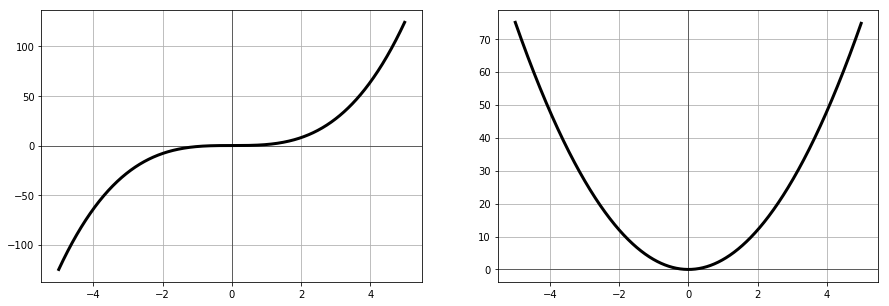

In [39]:
# Cube
pow3 = lambda x: x**3
pow3_d = lambda x: 3 * x**2
plot_with_derivative(pow3, pow3_d, name='Pow3')

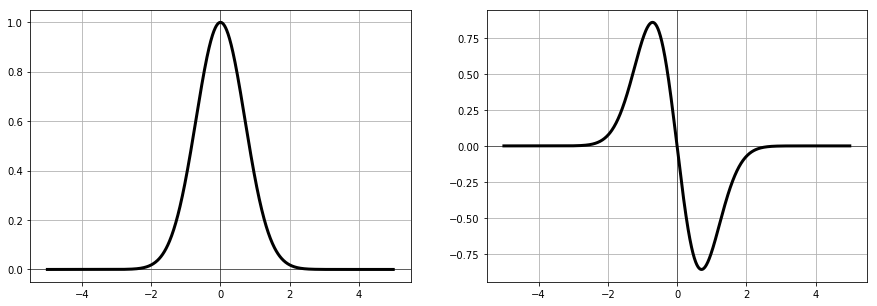

In [40]:
# Gauss
gauss = lambda x: m.exp(-x**2)
gauss_d = lambda x: -2*x*gauss(x)
plot_with_derivative(gauss, gauss_d, name='Gauss')

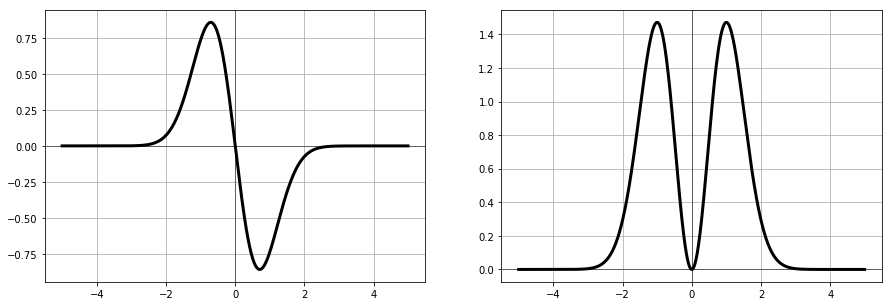

In [41]:
# Gauss deriv 1
gaussd1 = lambda x: -2 * x * gauss(x)
gaussd1_d = lambda x: 4 * x**2 * gauss(x)
plot_with_derivative(gaussd1, gaussd1_d, name='Gauss_d1')

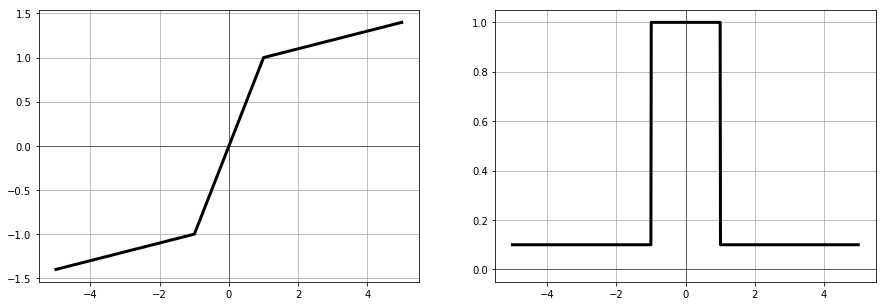

In [42]:
# PLU
alpha = 0.1
c = 1
plu = lambda x: max(alpha*(x+c)-c, min(alpha*(x-c)+c, x))
plu_d = lambda x: 1 if x>-c and x<c else alpha
plot_with_derivative(plu, plu_d, name='PLU')

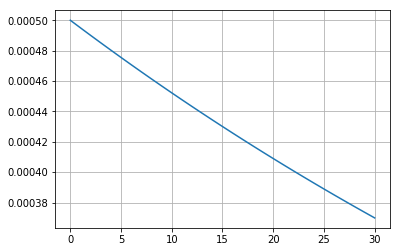

In [43]:
# Weight decay
x=range(int(31))
y=[5e-4 * 0.99**s for s in x]
plt.plot(x,y)
plt.grid()
plt.show()

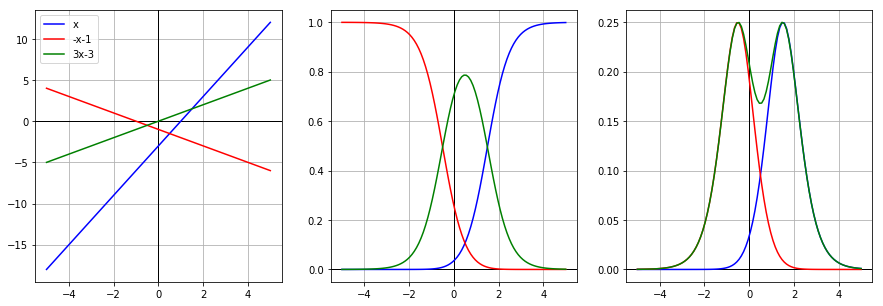

In [44]:
def softmax(x):
    e = np.exp(x)
    return e / np.sum(e, axis=0)

def softmax_d(x):
    e = softmax(x)
    return e * (1 - e)

x = np.linspace(-5, 5, 100)
x_l = np.array([x, -(x+1), 3*(x-1)])

y = softmax(x_l)
y_d = softmax_d(x_l)

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.axhline(0, color='black', lw=1)
plt.axvline(0, color='black', lw=1)
plt.plot(x, x_l[2,:], 'b', label='x')
plt.plot(x, x_l[1,:], 'r', label='-x-1')
plt.plot(x, x_l[0,:], 'g', label='3x-3')
plt.legend()
plt.grid()

plt.subplot(1,3,2)
plt.axhline(0, color='black', lw=1)
plt.axvline(0, color='black', lw=1)
plt.plot(x, y[2,:], 'b')
plt.plot(x, y[1,:], 'r')
plt.plot(x, y[0,:], 'g')
plt.grid()

plt.subplot(1,3,3)
plt.axhline(0, color='black', lw=1)
plt.axvline(0, color='black', lw=1)
plt.plot(x, y_d[2,:], 'b')
plt.plot(x, y_d[1,:], 'r')
plt.plot(x, y_d[0,:], 'g')
plt.grid()

plt.savefig(save_dir+'func_Softmax.pdf', bbox_inches = 'tight', pad_inches = 0)
plt.show()

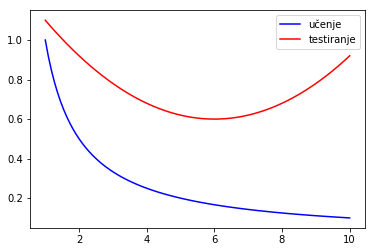

In [45]:
# Train-test U-curve

x = np.linspace(1,10,100)
tr = 1/x
ts = 0.02*(x-6)**2 + 0.6
plt.plot(x, tr, 'b', label='učenje')
plt.plot(x, ts, 'r', label='testiranje')
#plt.xticks([])
#plt.yticks([])
plt.legend()
plt.savefig(save_dir+'train_test.pdf', bbox_inches = 'tight', pad_inches = 0)
plt.show()

In [46]:
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.linear_model import LinearRegression

# np.random.seed(42)
# x = np.random.rand(20)*3
# x = np.sort(x)

# t = x**2 +2*x + 1

# poly1 = PolynomialFeatures(1)
# x_1 = poly1.fit_transform(x, t)

# lin = LinearRegression()
# y_1 = lin.fit_transform(x_1, t)

# plt.scatter(x,t)
# plt.show()

# Evolved activation functions

### DPAv2

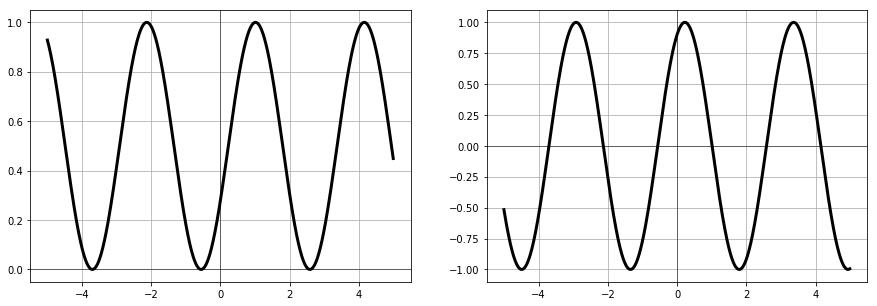

-4.153574932708071


In [47]:
f = lambda x: (m.cos(x-0.08517142337885375 - 0.8924356742911872 - 3 -0.08517142337885375 - 0.09079641165917596))**2

plot_with_derivative(f, auto_derivate(f), name='dpav2_gp_f1')
print(-0.08517142337885375 - 0.8924356742911872 - 3 -0.08517142337885375 - 0.09079641165917596)

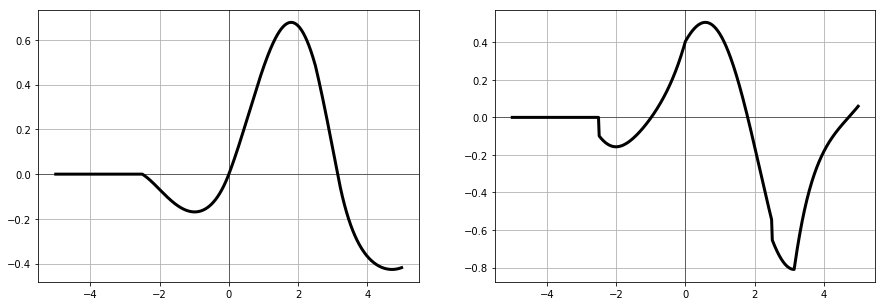

In [48]:
alpha = 1
f = lambda x: elu(elu(min(1,min(1,hsigmoid(x))*0.8102254104210314*m.sin(x))))

plot_with_derivative(f, auto_derivate(f), name='dpav2_gp_f2')

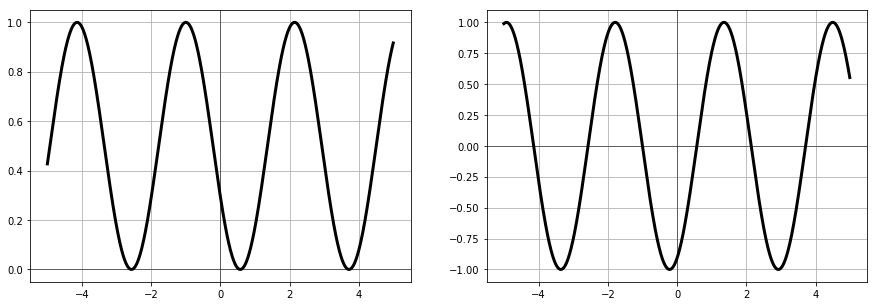

In [49]:
f = lambda x: (m.cos(1+x))**2

plot_with_derivative(f, auto_derivate(f), name='dpav2_gp_f3')

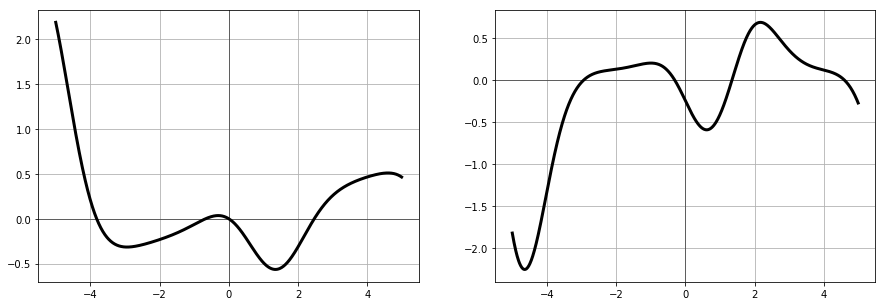

In [50]:
f = lambda x: -swish(swish(m.cos(x - 0.8949527515835601))) * x
plot_with_derivative(f, auto_derivate(f), name='dpav2_gp_f4')

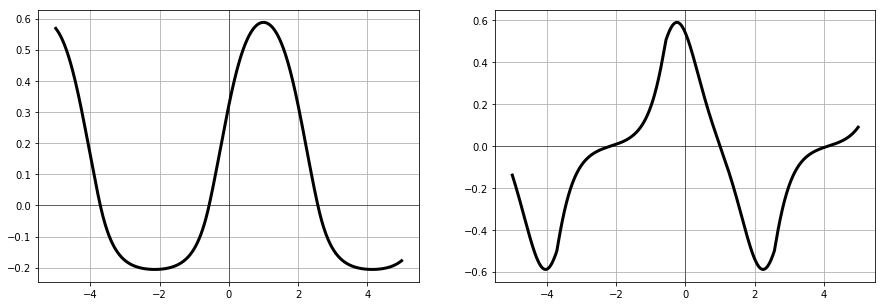

In [51]:
f = lambda x: swish(elu(m.sin(m.cos(x - 1.0 + 0.1607274601962161**9))))
plot_with_derivative(f, auto_derivate(f), name='dpav2_gp_f5')

### DPAv4

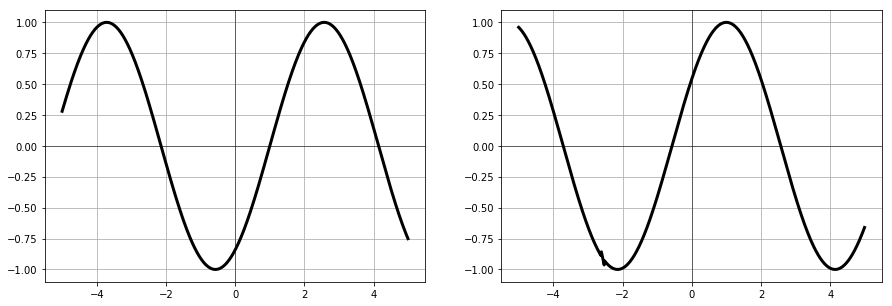

In [52]:
f = lambda x: m.sin (min (m.sin (min (x,0.5068783911631836) + 1.0),-0.9990098031722499) + x)
plot_with_derivative(f, auto_derivate(f), name='dpav4_gp_f1')

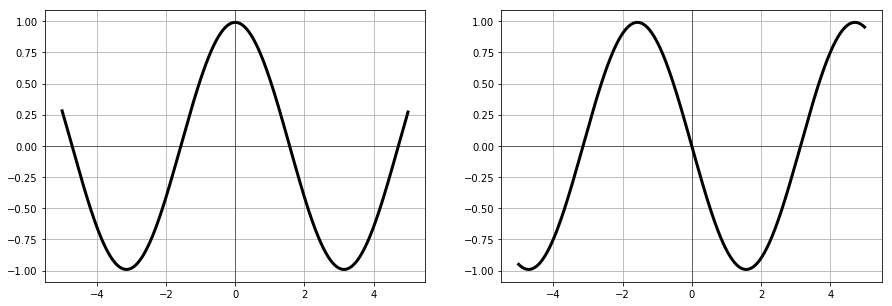

In [53]:
f = lambda x: m.cos (x) * 0.9910098031767487
plot_with_derivative(f, auto_derivate(f), name='dpav4_gp_f2')

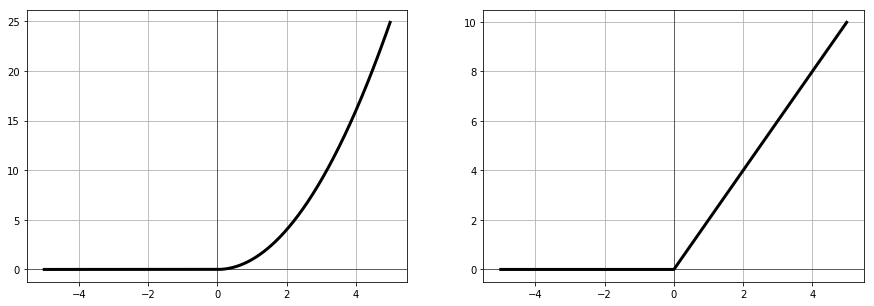

In [54]:
f = lambda x: relu(abs(x)*x)
plot_with_derivative(f, auto_derivate(f), name='dpav4_gp_f3')

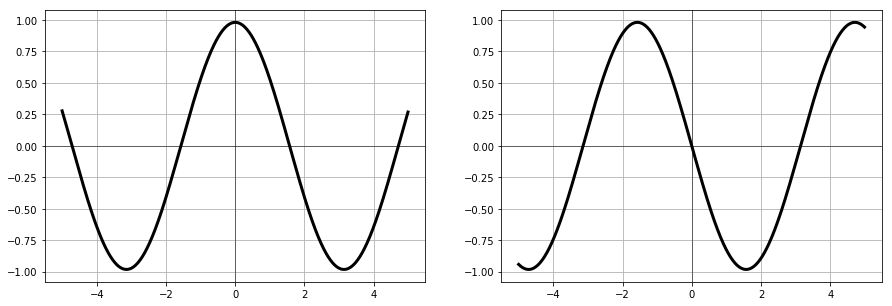

In [55]:
f = lambda x: m.cos (x) * 0.9815578450294762
plot_with_derivative(f, auto_derivate(f), name='dpav4_gp_f4')

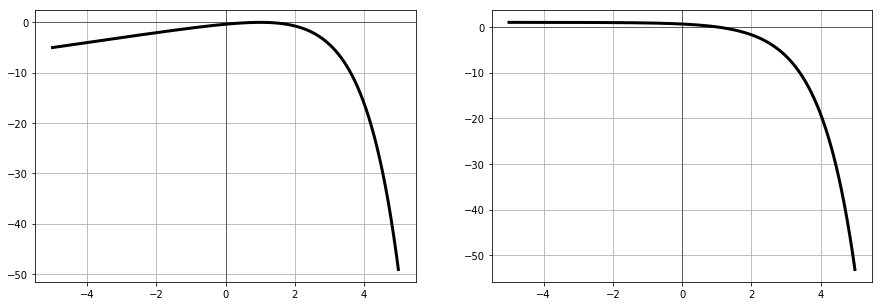

In [56]:
f = lambda x: x-m.exp(x-1)
plot_with_derivative(f, auto_derivate(f), name='dpav4_gp_f5')

# Activation function input distributions

In [57]:
import csv

# Will be automatically modified.
func_range_min = -5.
func_range_max = 5.
bins = 101

def load_array(file):
    params = None
    data = []
    with open(file, 'r') as f:
        reader = csv.reader(f, delimiter='\t')
        t=True
        for row in reader:
            if t:
                params = list(map(float, row))
                t = False
            else:
                data.append(list(map(int,row)))

    global func_range_min
    global func_range_max
    global bins
    func_range_min = params[0]
    func_range_max = params[1]
    bins = params[2]

    return np.array(data)

def normalize(data):
    return data / np.max(data, axis=1)[:,None]

def draw_data(data, f, f_d, dist_scale=1):
    layers = data.shape[0]
    bins = data.shape[1]

#     a = data[:, data != 0]
#     minx = min(a)
#     maxx = max(a)
#     bins = maxx - minx + 1
    
    
    #spltx = min(2, layers)
    #splty = m.ceil(layers / spltx)
    spltx = 2
    splty = layers

    plt.figure(figsize=(15,splty*5))
    for l in range(layers):        
        minx = func_range_min
        maxx = func_range_max
        
        x = np.linspace(minx, maxx, (maxx-minx)*100)
        y = [f(v) for v in x]
        y_d = [f_d(v) for v in x]
        mi = min(min(y), min(y_d))
        ma = max(max(y), max(y_d))
        
        # Function.
        plt.subplot(splty, spltx, 2*l+1)
        plt.fill_between([minx + a * (maxx-minx)/bins for a in range(bins)],
                         [mi]*bins,
                         dist_scale*data[l,:]+mi,
                         color='0.7')
        plt.plot(x, y, 'b')
        plt.axhline(linewidth=.5, color='#000000')
        plt.axvline(linewidth=.5, color='#000000')
        plt.ylim(mi, ma)
        if dist_scale != 1:
            plt.ylabel('Dist. skalirana '+str(dist_scale)+'x')
        plt.title('Funkcija skrivenog sloja ' + str(l + 1))
        
        # Derivative.
        plt.subplot(splty, spltx, 2*l+2)
        plt.fill_between([minx + a * (maxx-minx)/bins for a in range(bins)],
                         [mi]*bins,
                         dist_scale*data[l,:]+mi,
                         color='0.7')
        plt.plot(x, y_d, 'b')
        plt.axhline(linewidth=.5, color='#000000')
        plt.axvline(linewidth=.5, color='#000000')
        plt.ylim(mi, ma)
        if dist_scale != 1:
            plt.ylabel('Dist. skalirana '+str(dist_scale)+'x')
        plt.title('Derivacija skrivenog sloja ' + str(l + 1))
    
def run_for(dist_file, f, f_d, name, dist_scale=1):
    data = load_array(dist_file)
    data = normalize(data)
    draw_data(data, f, f_d, dist_scale)
    plt.savefig(save_dir+'afdist_'+name+'.pdf', bbox='tight')
    plt.show()

### DPAv2

/home/lirfu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:53: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


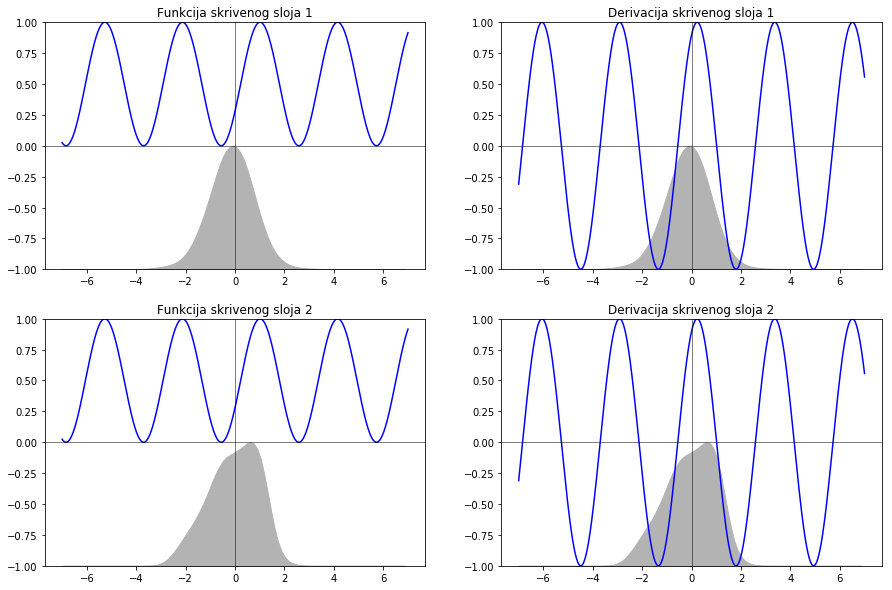

In [58]:
f = lambda x: (m.cos(x-0.08517142337885375 - 0.8924356742911872 - 3 -0.08517142337885375 - 0.09079641165917596))**2
run_for('../../sol/noiseless_all_training_256class/gp_activation_taboo2/1/activations.csv', f, auto_derivate(f), 'dpav2_f1')

/home/lirfu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:53: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


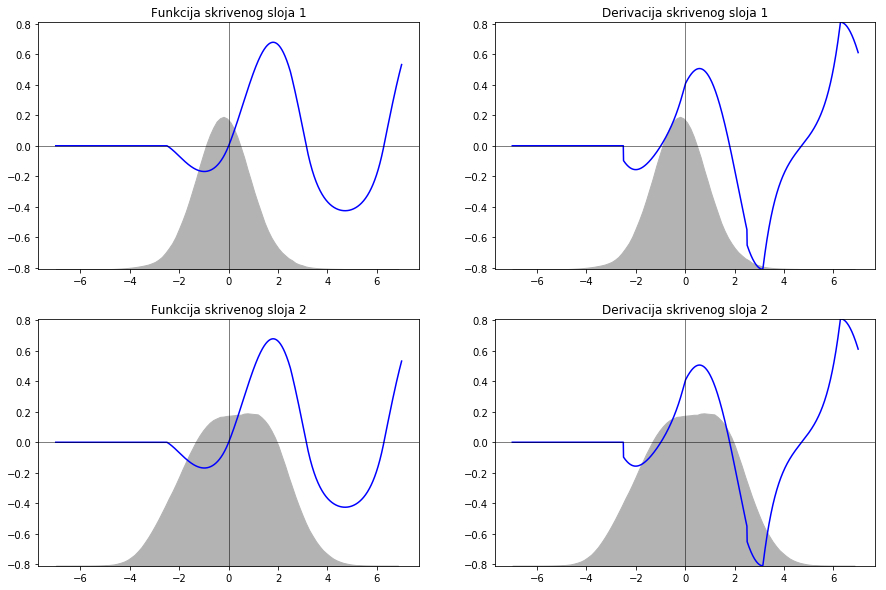

In [59]:
alpha = 1
f = lambda x: elu(elu(min(1,min(1,hsigmoid(x))*0.8102254104210314*m.sin(x))))
run_for('../../sol/noiseless_all_training_256class/gp_activation_taboo3/9/activations.csv', f, auto_derivate(f), 'dpav2_f2')

/home/lirfu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:53: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


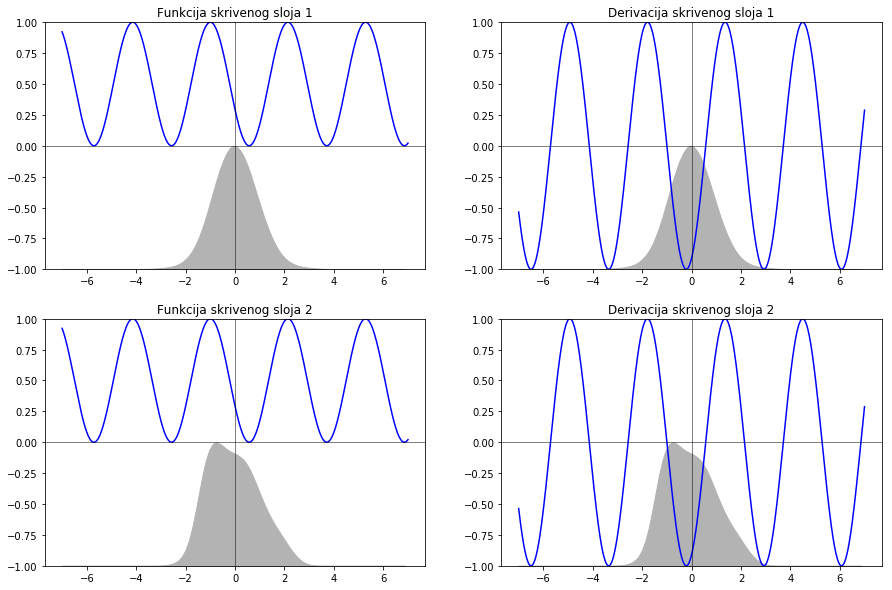

In [60]:
f = lambda x: (m.cos(1+x))**2
run_for('../../sol/noiseless_all_training_256class/gp_activation_taboo0/4/activations.csv', f, auto_derivate(f), 'dpav2_f3')

/home/lirfu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:53: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


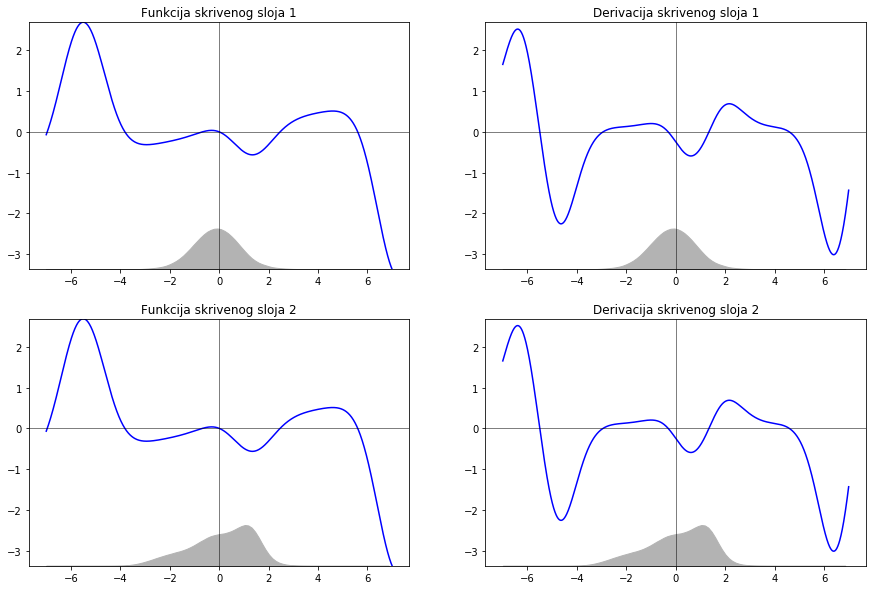

In [61]:
f = lambda x: -swish(swish(m.cos(x - 0.8949527515835601))) * x
run_for('../../sol/noiseless_all_training_256class/gp_activation_taboo0/1/activations.csv', f, auto_derivate(f), 'dpav2_f4')

/home/lirfu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:53: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


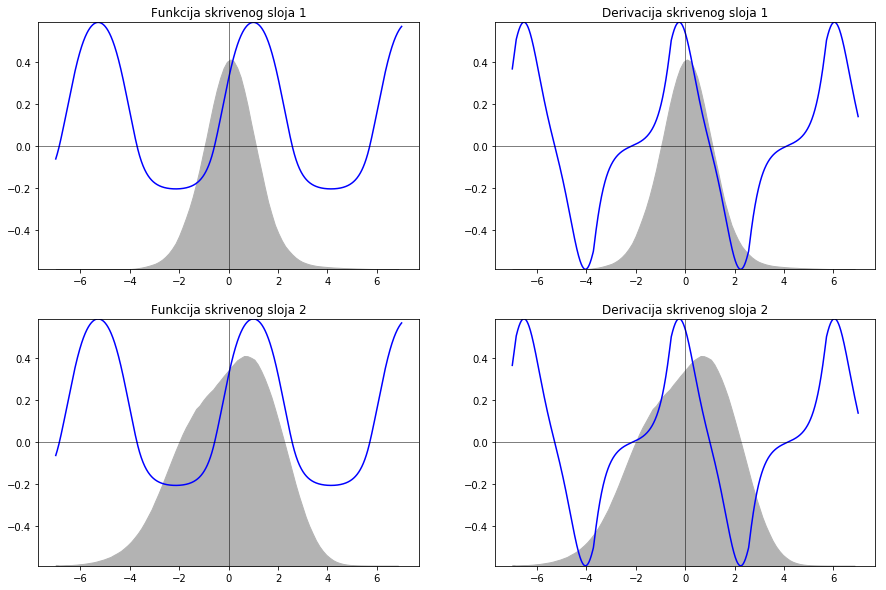

In [62]:
f = lambda x: swish(elu(m.sin(m.cos(x - 1.0 + 0.1607274601962161**9))))
run_for('../../sol/noiseless_all_training_256class/gp_activation_taboo3/1/activations.csv', f, auto_derivate(f), 'dpav2_f5')

### DPAv4

/home/lirfu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:53: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


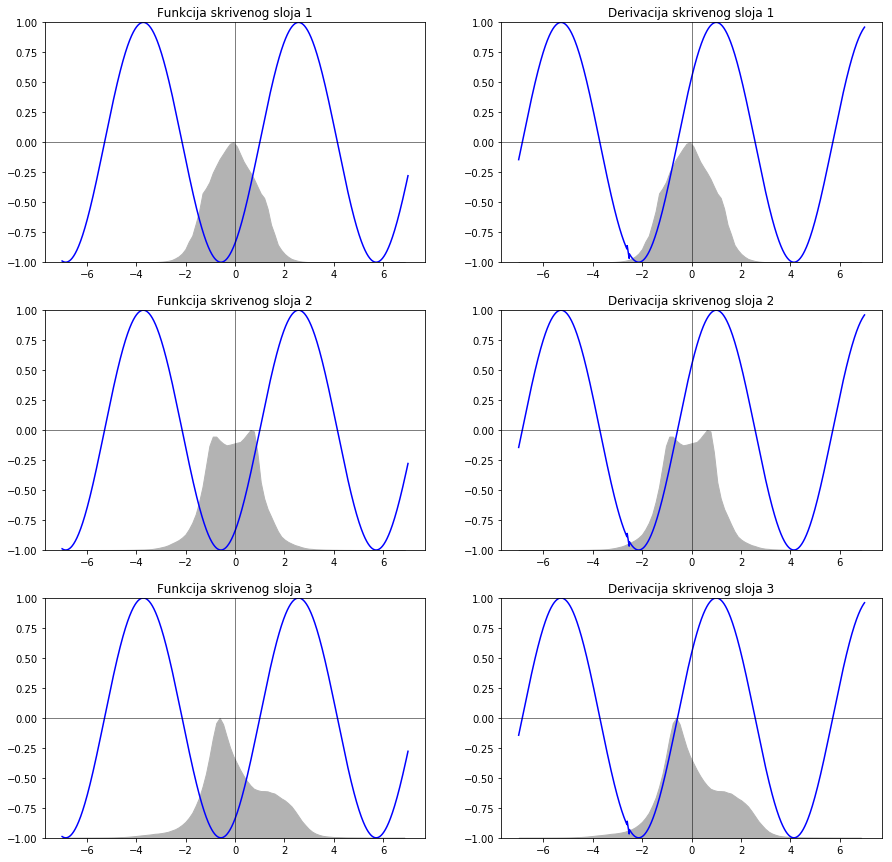

In [63]:
f = lambda x: m.sin (min (m.sin (min (x,0.5068783911631836) + 1.0),-0.9990098031722499) + x)
run_for('../../sol/noiseless_all_training_9class/gp_activation_taboo3/4/activations.csv', f, auto_derivate(f), 'dpav4_f1')

/home/lirfu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:53: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


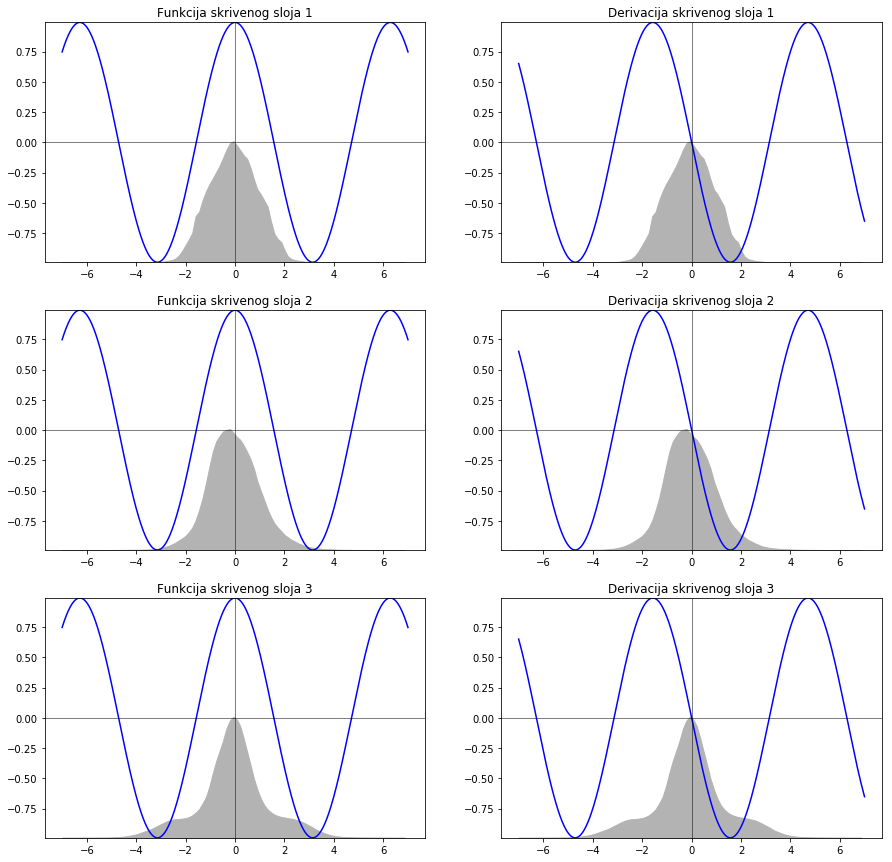

In [64]:
f = lambda x: m.cos (x) * 0.9910098031767487
run_for('../../sol/noiseless_all_training_9class/gp_activation_taboo1/1/activations.csv', f, auto_derivate(f), 'dpav4_f2')

/home/lirfu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:53: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


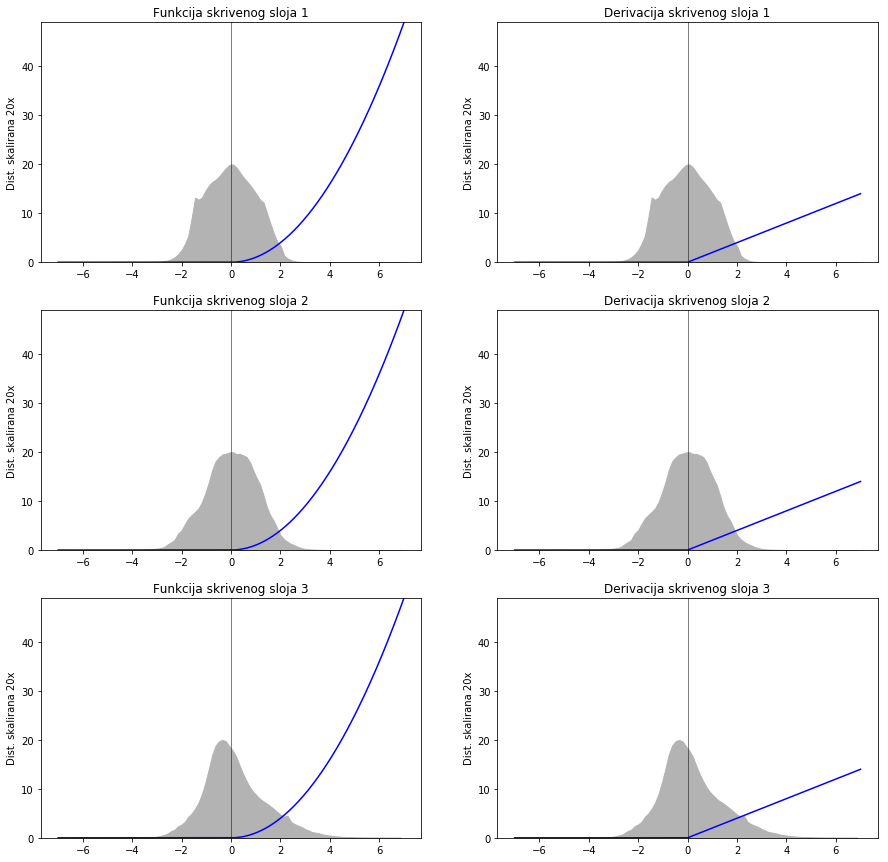

In [65]:
f = lambda x: relu(abs(x)*x)
run_for('../../sol/noiseless_all_training_9class/gp_activation_taboo2/6/activations.csv', f, auto_derivate(f), 'dpav4_f3', 20)

/home/lirfu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:53: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


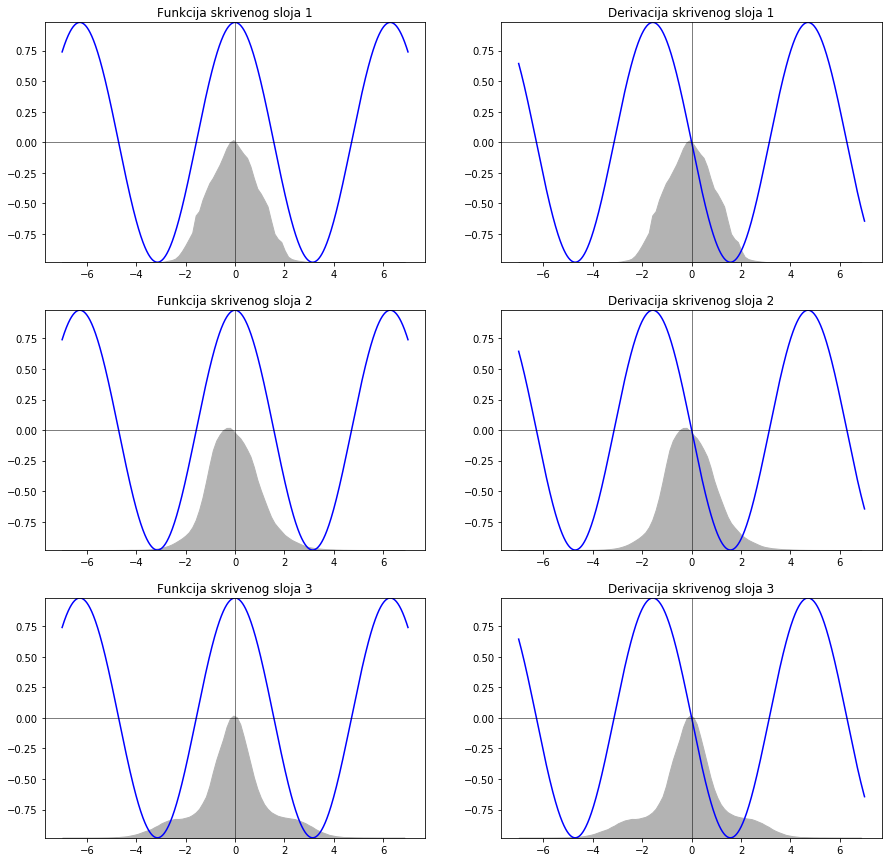

In [66]:
f = lambda x: m.cos (x) * 0.9815578450294762
run_for('../../sol/noiseless_all_training_9class/gp_activation_taboo3/1/activations.csv', f, auto_derivate(f), 'dpav4_f4')

/home/lirfu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:53: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


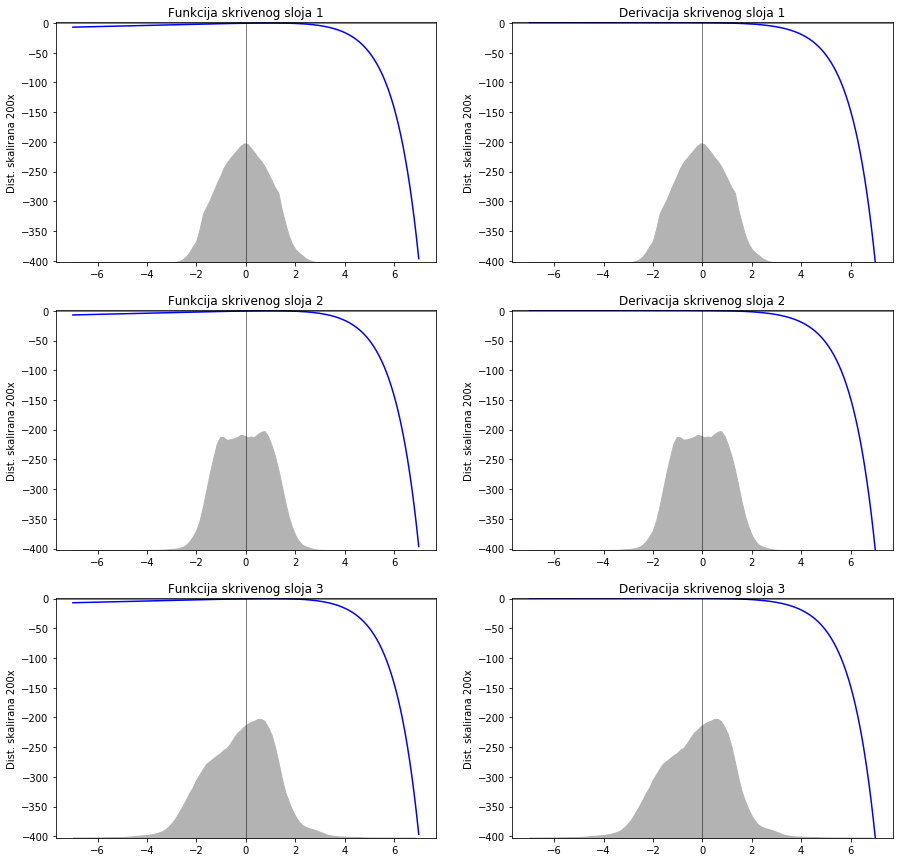

In [67]:
f = lambda x: x-m.exp(x-1)
run_for('../../sol/noiseless_all_training_9class/gp_activation_taboo4/6/activations.csv', f, auto_derivate(f), 'dpav4_f5', 200)